In [2]:
from brian2 import*
import functions
import paintapp
from IPython.display import Video, Image
from opencvtry import cvWriter
import parameter_tuning
import copy

%load_ext autoreload
%autoreload 2


## Create, Run and Plot
Create the Model.
Run the model for 100 ms.
Plot the voltages of some cells.

## Create the trajectory
With a paint app, we draw the trajectory we want.
First we draw a trajectory by using the "paintapp.py".

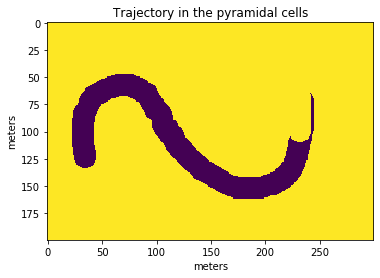

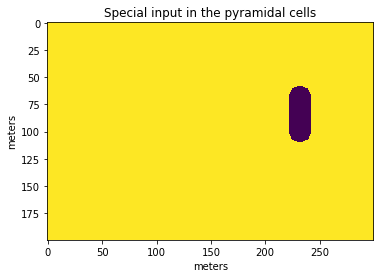

In [23]:
trajectory, inputs = paintapp.create_trajectory_and_inputs()

## Exploration of parameters
Explore parameters to find some appropriate one. 

In [279]:
params = {'trajectory' : trajectory,          
          'rec_weight' : 3.,
          'noise_weight' : 0.1,
          'R_weight' : 10.,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.01,
          'tau_dyn_inh' : 10 * ms
         }

    
list_params = [params]

In [24]:
params = {'trajectory' : trajectory,  
          'inputs' : inputs,
          'rec_weight' : 3.,
          'INPUT_weight': 10,
          'noise_weight' : 0.,
          'R_weight' : 0.,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.,
          'tau_dyn_inh' : 10 * ms,
          "P_input_rate" : 200 * Hz,
            "P_weight" : 2.,
         }
    
list_params = [params]

yo
input synapses well connected
2 * self.p[INPUT_weight]
20


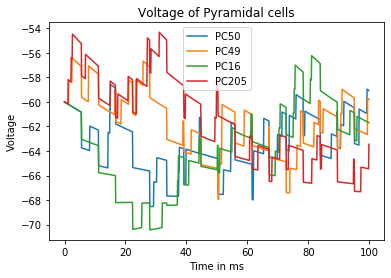

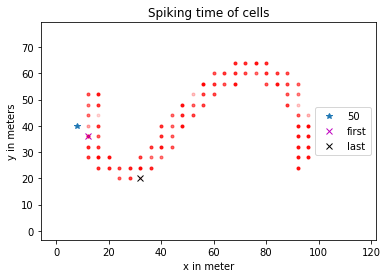

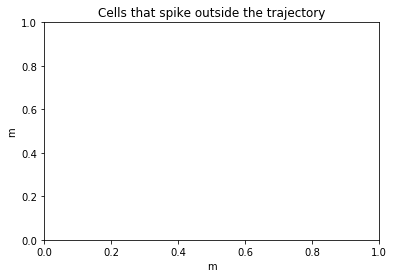

WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]
WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]
WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
 [py.warnings]
WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
 [py.warnings]
WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in doubl

In [25]:
fm1 = functions.plot_run(params, 'FairhallModel', plasticity=False, record_=True)

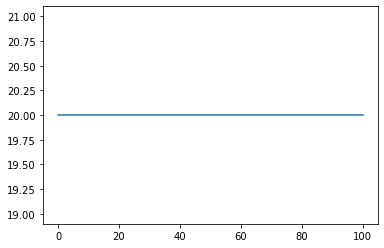

In [21]:
plot(fm1.MINPUT.t / ms, fm1.MINPUT.w[0])

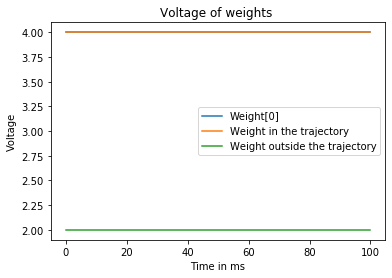

In [7]:
functions.plot_voltages_other_types(fm1, ['weights'])

In [313]:
n = fm1.p['rows'] * fm1.p['cols'] -1
np.int(fm1.PC.x[n] / meter)

116

## Plot the voltage of different cells

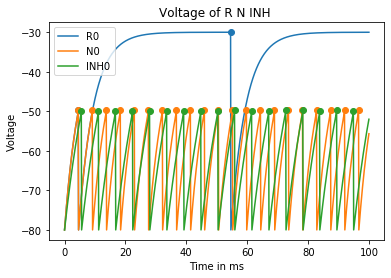

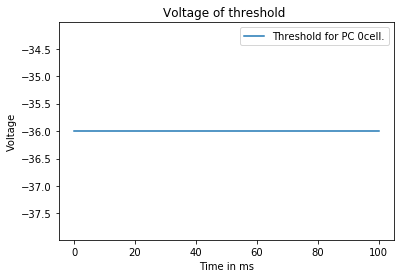

In [210]:
functions.plot_voltages_other_types(fm1)
functions.plot_voltages_other_types(fm1, ["threshold"])

## Video of spikes
Video of pyramidal cells and their spike times.

In [8]:
base_matrix, height, width = functions.new_spike_times(fm1, filePathName = "./video_spikes.mp4")

100.0
100
Started spike_times_to_matrix
Finished spike_times_to_matrix in 0.06482553482055664


In [9]:
video = Video("./video_spikes.mp4",embed=True, width= 10 * width, height= 10 * height)
video

## Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- INH inputs, inhibitory inputs
- N inputs, noise 2 higher in the trajectory
- R inputs, random to break synchronity

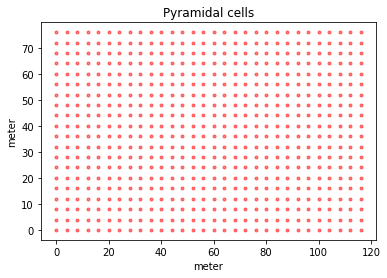

In [228]:
color = 'r'
for i in range(fm1.p['rows']*fm1.p['cols']):
    plot(fm1.PC.x[i] / meter, fm1.PC.y[i] / meter, color + '.', alpha = 0.5)
xlabel("meter")
ylabel("meter", rotation='vertical')
title("Pyramidal cells")
show()

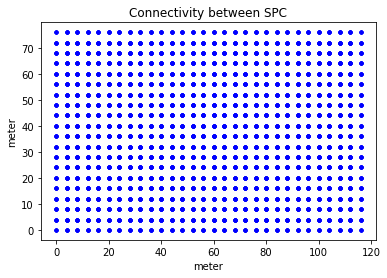

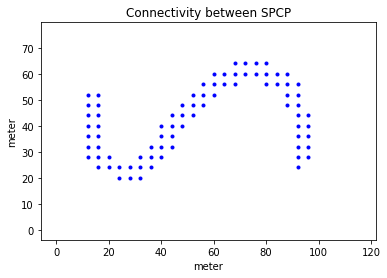

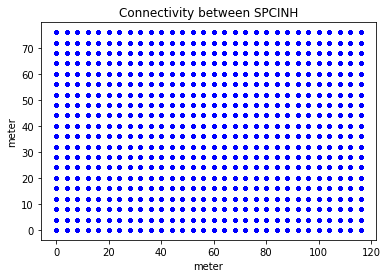

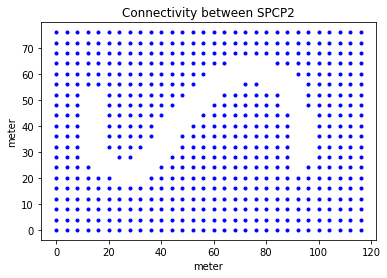

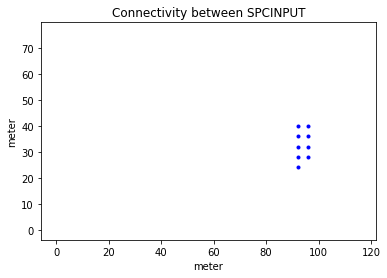

In [27]:
result = functions.plot_all_connectivity(fm1)


## Some tools


## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

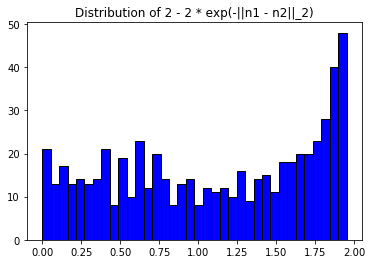

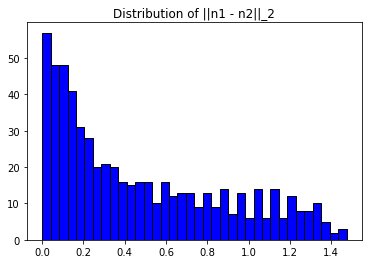

In [111]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

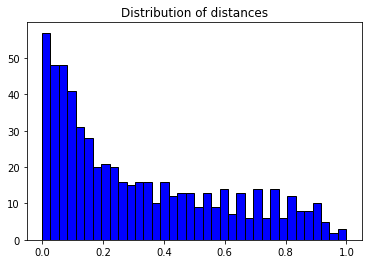

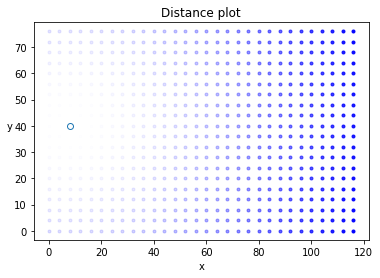

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## Parameter exploration
Can explore the different parameters and their consequences.

In [206]:
n = 3
my_dict = {'rec_weight' : 2.5 ,
            'inh_weight_pi' : 0.1,
            }
step = [0.5, 0.1]

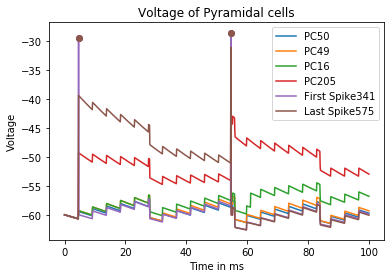

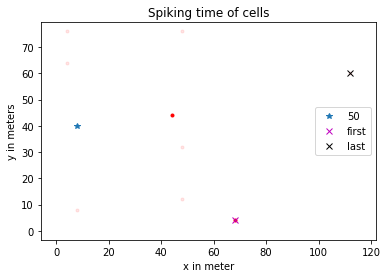

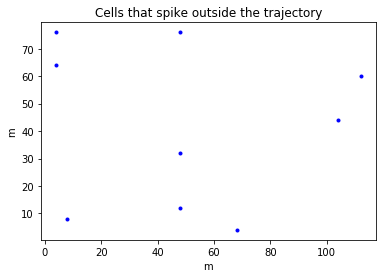

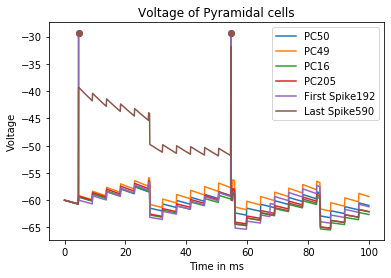

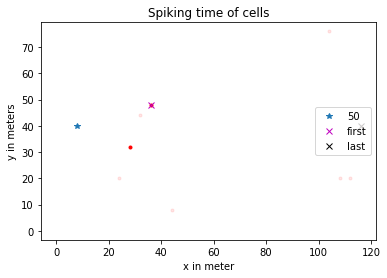

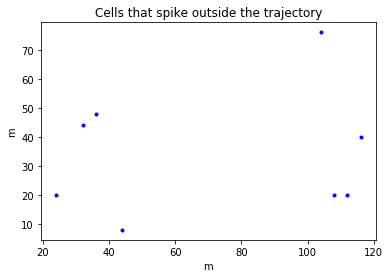

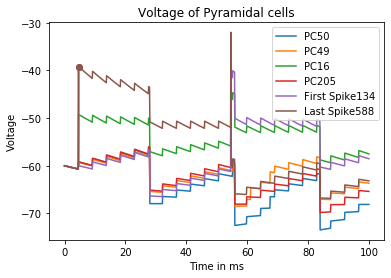

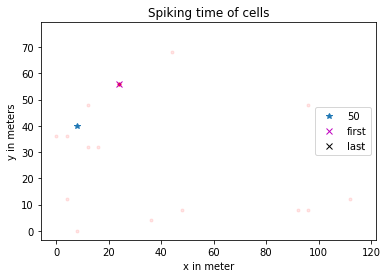

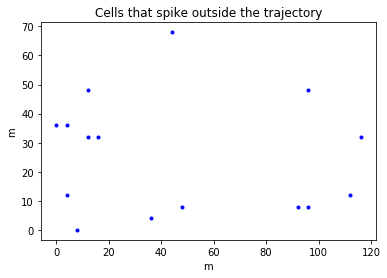

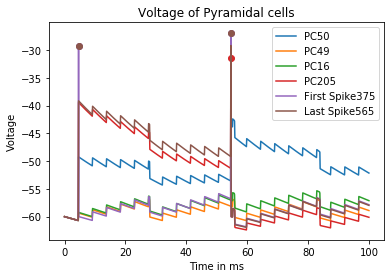

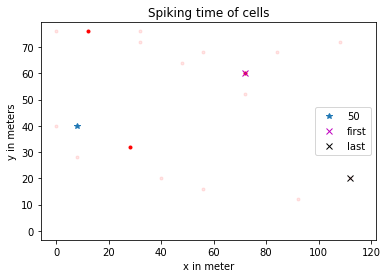

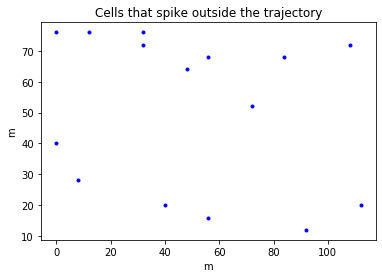

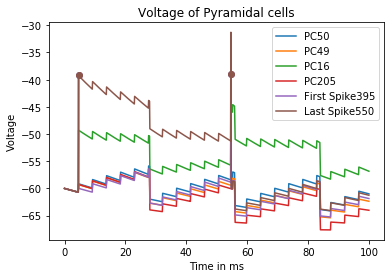

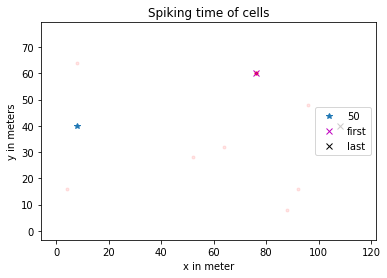

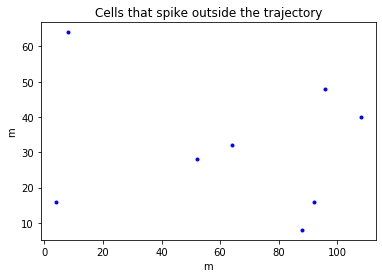

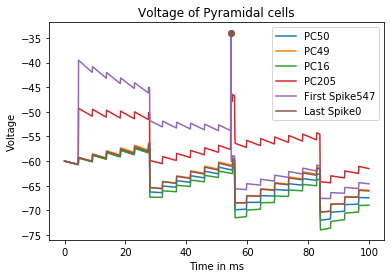

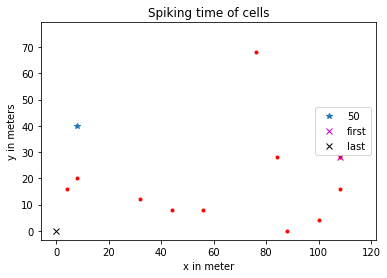

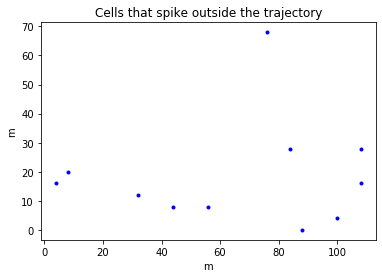

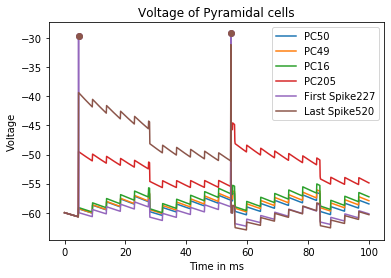

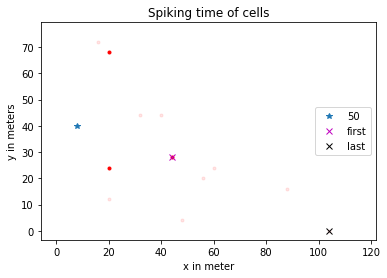

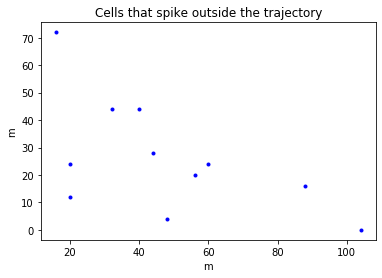

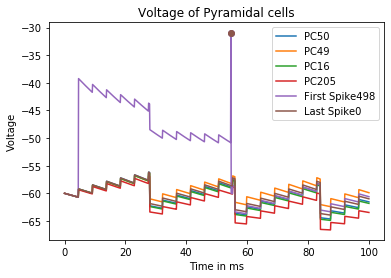

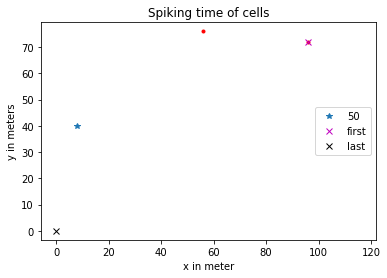

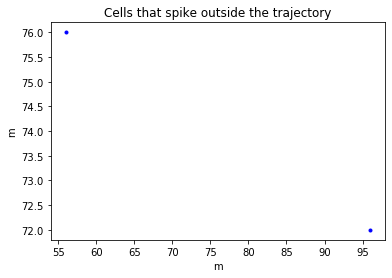

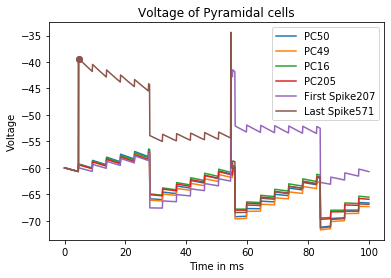

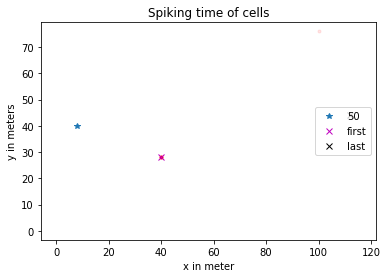

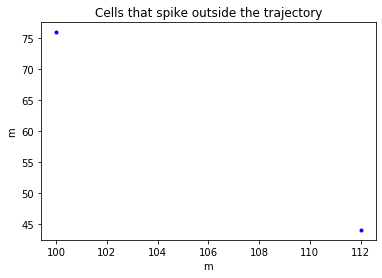

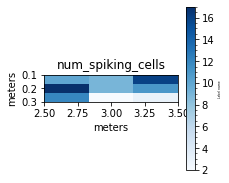

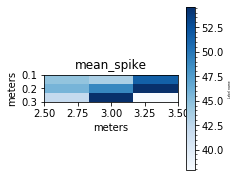

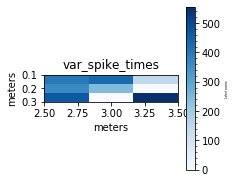

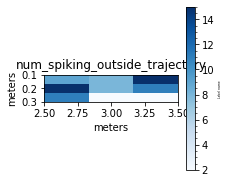

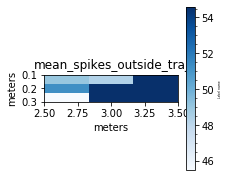

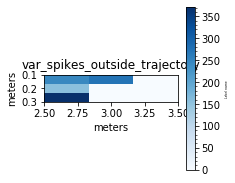

In [207]:
functions.explore_hyperparameters(my_dict=my_dict, step=step, n=n, model="ThresholdModel", trajectory=trajectory)